# Compare the differente segmenations tries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pltgeopandas.GeoSeries(

In [2]:
versions = [30]

In [3]:
def diagnostic_plots(transcripts, title, ax1, ax2, ax3):
    
    # how many transcripts are assigned to a cell
    transcript_in_cell = (transcripts.cell > 0).value_counts()
    ax1.pie(transcript_in_cell, explode=[0.1, 0], labels=['in cell', 'not in cell'], 
           autopct='%1.1f%%',
            startangle=90)
    ax1.axis('equal') # to make a circle
    ax1.set_title(f"Transcripts assigned to cell \n total: {np.max(transcripts.cell)} cells")

    # how many transcripts per cell
    transcripts_per_cell = transcripts[transcripts.cell > 0].groupby("cell").size()
    ax2.hist(np.log10(transcripts_per_cell), bins=50, rwidth=0.9,color='#607c8e')
    add_mean_and_median(transcripts_per_cell, ax2, fn = lambda x:np.log10(x))
    ax2.set_xlabel(r"$log_{10}(Transcripts\ per\ cell)$")
    ax2.set_ylabel(r"$cells$")
    ax2.set_title(f"Transcripts per cell\nm = {title}")
    # np.log10(transcripts[transcripts.cell > 0].groupby("cell").size()).plot.hist(grid=True, bins=50, rwidth=0.9,color='#607c8e')


    # how many features per cell
    features_per_cell = transcripts[transcripts.cell > 0].groupby("cell")['gene'].nunique()
    ax3.hist(features_per_cell, bins=50, rwidth=0.9,color='#607c8e')
    add_mean_and_median(features_per_cell, ax3)
    ax3.set_xlabel(r"$Features\ per\ cell$")
    ax3.set_ylabel(r"$cells$")
    ax3.set_title("Features per cell")

    return(ax1, ax2, ax3)

def add_mean_and_median(values, ax, fn = lambda x:x):
    mean = values.mean()
    median = values.median()
    ax.axvline(fn(mean), color='k', linestyle='dashed', linewidth=1)
    ax.axvline(fn(median), color='m', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = ax.get_ylim()
    xpos = max(fn(mean)*1.1, fn(median)*1.1)
    ax.text(xpos, max_ylim*0.9, 'Mean: {:.2f}\nMedian: {:.2f}'.format(mean, median))

>>> making plots for m = 30


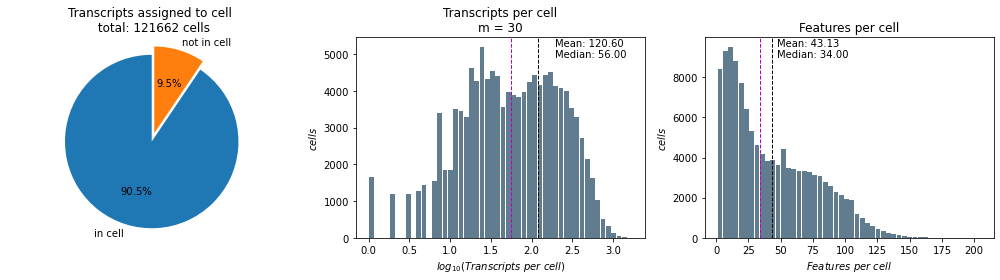

In [4]:
nrows = len(versions)

fig = plt.figure(figsize = (14,4*nrows))

for i in range(nrows):
    v = versions[i]
    print(f">>> making plots for m = {v}")
    ax1 = fig.add_subplot(nrows,3,1+i*3)
    ax2 = fig.add_subplot(nrows,3,2+i*3)
    ax3 = fig.add_subplot(nrows,3,3+i*3)

    transcripts = pd.read_csv("baysor_"+str(v)+"_mol_per_cell/segmentation.csv")

    ax1, ax3, ax3 = diagnostic_plots(transcripts, v, ax1, ax2, ax3)

fig.tight_layout(h_pad=1.1)
fig.savefig('07_diagnostic_plots.jpg', dpi = 100)

